### 1.数据预处理

#### 1.1 导入必要库

In [31]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2 数据集获取

In [32]:
# 查看当前数据集信息(晒重后)
def count_files_in_subdirectories(directory='.'):
    for subdir, dirs, files in os.walk(directory):
        # Exclude hidden directories
        dirs[:] = [d for d in dirs if not d.startswith('.')]
        
        # Count non-hidden files in the current subdirectory
        file_count = len([f for f in files if not f.startswith('.')])
        
        # Print directory name and file count
        print(f"{subdir}: {file_count}")

# Call the function with the current directory
count_files_in_subdirectories()

.: 9
.\Allaple.A: 2949
.\Fakerean: 199
.\Instantaccess: 431
.\Obfuscator.AD: 142
.\Skintrim.N: 80
.\VB.AT: 408
.\Wintrim.BX: 97
.\Yuner.A: 133


In [33]:
# 定义恶意软件家族和文件夹对应关系
families = {
    "Allaple.A": "./Allaple.A",
    "Fakerean": "./Fakerean",
    "Instantaccess": "./Instantaccess",
    "Obfuscator.AD": "./Obfuscator.AD",
    "Skintrim.N": "./Skintrim.N",
    "VB.AT": "./VB.AT",
    "Wintrim.BX": "./Wintrim.BX",
    "Yuner.A": "./Yuner.A"
}

In [34]:
# 图像数据和标签列表
X = []  # 图像特征向量
y = []  # 标签

# 遍历每个家族的文件夹，读取图像并转换为特征向量
for family, folder in families.items():
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # 使用OpenCV读取图像
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            # 将图像调整为固定大小，这里粗略的为64x64
            img_resized = cv2.resize(img, (64, 64))
            # 将图像展平成一维向量
            img_flatten = img_resized.flatten()
            # 添加到数据列表中
            X.append(img_flatten)
            y.append(family)

In [35]:
# 将数据转换为NumPy数组
X = np.array(X)
y = np.array(y)
print(X.shape, y.shape)

(4439, 4096) (4439,)


### 2.特征工程

#### 2.1 数据标准化

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 2.2 使用PCA降维

In [37]:
# 使用PCA降维，将维度减少到100
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)

#### 2.3 数据集划分

In [38]:
# 划分训练集和测试集（90%用于训练，10%用于测试）
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)

### 3.模型训练与评估

#### 3.1首先进行单次的模型训练与测试评估

In [39]:
# 创建KNN模型，设置k=3
knn = KNeighborsClassifier(n_neighbors=3)
# 训练KNN模型
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# 使用测试集进行预测
y_pred = knn.predict(X_test)
y_pred

array(['Allaple.A', 'VB.AT', 'Allaple.A', 'Allaple.A', 'Allaple.A',
       'Instantaccess', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'VB.AT',
       'Allaple.A', 'VB.AT', 'Allaple.A', 'Allaple.A', 'Instantaccess',
       'Allaple.A', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'VB.AT',
       'Skintrim.N', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'VB.AT',
       'Skintrim.N', 'Allaple.A', 'Allaple.A', 'Yuner.A', 'Allaple.A',
       'Allaple.A', 'Allaple.A', 'Instantaccess', 'Allaple.A',
       'Allaple.A', 'Allaple.A', 'Allaple.A', 'Yuner.A', 'VB.AT',
       'Allaple.A', 'Allaple.A', 'Allaple.A', 'Skintrim.N', 'Allaple.A',
       'Skintrim.N', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'VB.AT',
       'VB.AT', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'Skintrim.N',
       'Obfuscator.AD', 'Allaple.A', 'Allaple.A', 'Allaple.A',
       'Allaple.A', 'VB.AT', 'Allaple.A', 'Instantaccess', 'Allaple.A',
       'Allaple.A', 'Allaple.A', 'Allaple.A', 'Allaple.A', 'Allaple.A',
       'Allaple.A', 'Allaple.A', 

In [41]:
# 计算分类准确率
accuracy = accuracy_score(y_test, y_pred)
print(f"分类准确率: {accuracy}")

分类准确率: 0.9932432432432432


In [42]:
# 打印混淆矩阵并进行归一化处理
conf_matrix = confusion_matrix(y_test, y_pred, labels=list(families.keys()))

# 归一化混淆矩阵
conf_matrix_normalized = conf_matrix.astype(
    'float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print("归一化的混淆矩阵:")
print(conf_matrix_normalized)

归一化的混淆矩阵:
[[0.99838449 0.         0.00161551 0.         0.         0.
  0.         0.        ]
 [0.         0.94444444 0.         0.         0.         0.
  0.05555556 0.        ]
 [0.         0.         1.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         1.         0.
  0.         0.        ]
 [0.03571429 0.         0.         0.         0.         0.96428571
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         1.        ]]


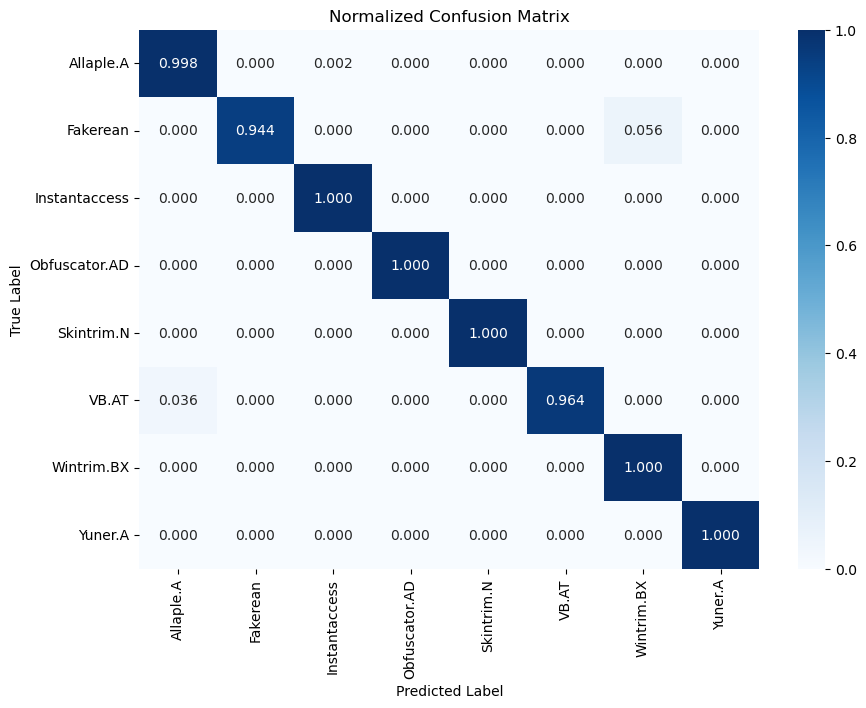

In [45]:
# 使用Seaborn绘制热力图
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".3f", cmap='Blues',
            xticklabels=families.keys(), yticklabels=families.keys())
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

#### 3.2 使用10折交叉验证评估模型

In [44]:
# 使用10折交叉验证评估模型
cross_val_scores = cross_val_score(knn, X_pca, y, cv=10)
print(
    f"10折交叉验证分类准确率: {np.mean(cross_val_scores)}, 标准差: {np.std(cross_val_scores)}")

10折交叉验证分类准确率: 0.9945940861855084, 标准差: 0.0068460201330945054
